In [5]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [98]:
df = pd.read_csv("./results/oob/mm_oob_fr.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,first_run,second_run,compile_time
0,f16_m2,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,864.911079,315.552950,467.863083,220.296383,313937.596083,300.719738,614709.889889,383.968353,614325.921535
1,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,7999.850512,325.554609,1261.545420,378.574133,299146.206379,302.069187,617103.030682,377.490520,616725.540161
2,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,5387.188196,325.671434,1948.537827,989.125967,293075.178862,380.997658,617366.255522,531.836748,616834.418774
3,f16_m2,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,665.869713,319.411755,3725.061417,3474.720716,295085.936785,713.591576,631237.223148,1234.710217,630002.512932
4,f16_m2,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,680.204630,324.748755,7836.548090,7629.070282,289667.451382,1435.467005,622559.059858,2562.423944,619996.635914
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,726.066828,338.922739,13527.133465,13388.447762,290860.767365,2126.765251,631871.958971,4809.458256,627062.500715


In [99]:
conf_infos = dict()
infs = ['in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'}}

In [100]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Data movement

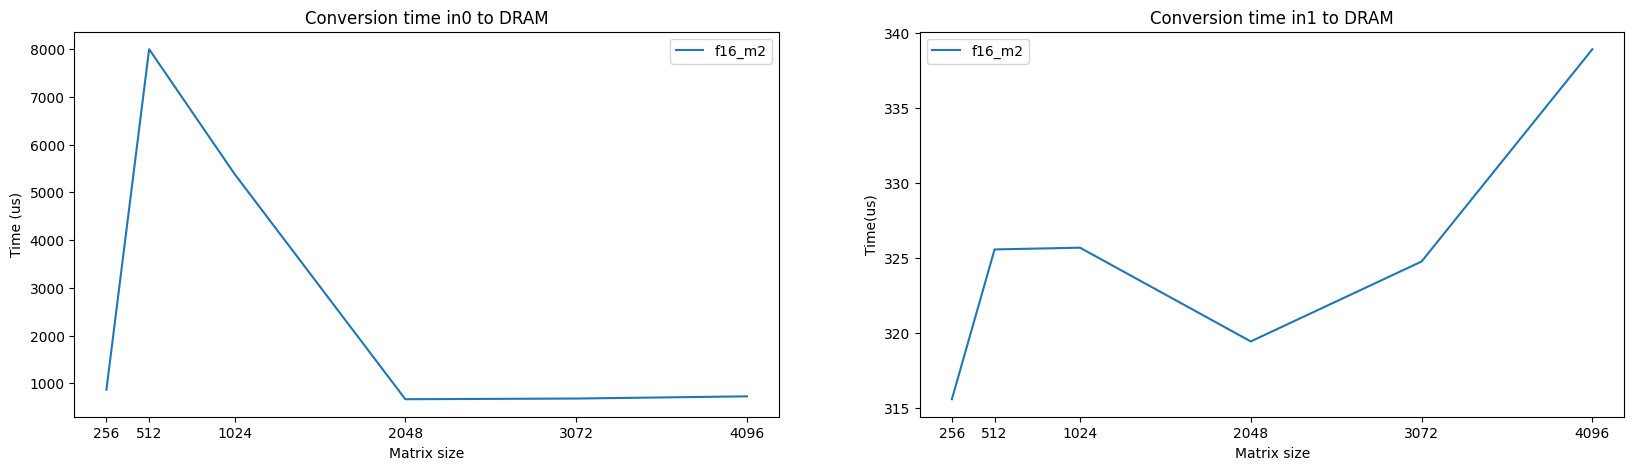

In [101]:
df_conversion0 = get_column_df_info(df, 'conversion_in0', mean=True) 
df_conversion1 = get_column_df_info(df, 'conversion_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_conversion0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Conversion time in0 to DRAM")

plot = sns.lineplot(df_conversion1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Conversion time in1 to DRAM")

plt.show()

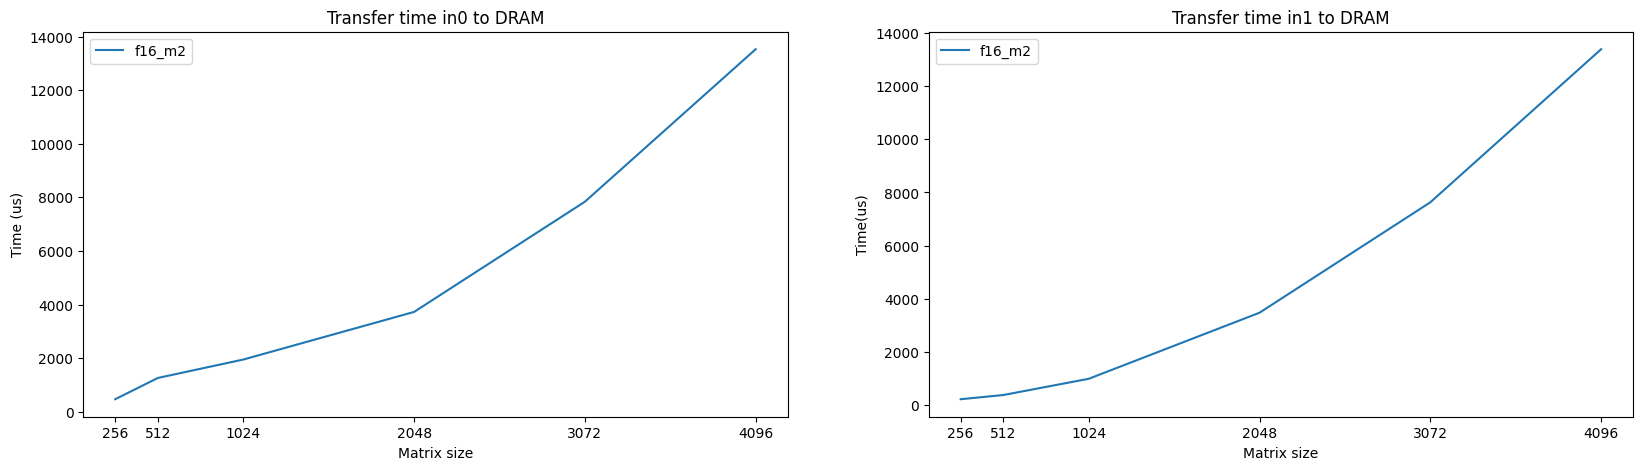

In [102]:
df_transf0 = get_column_df_info(df, 'transfer_in0', mean=True) 
df_transf1 = get_column_df_info(df, 'transfer_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer time in0 to DRAM")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Transfer time in1 to DRAM")

plt.show()


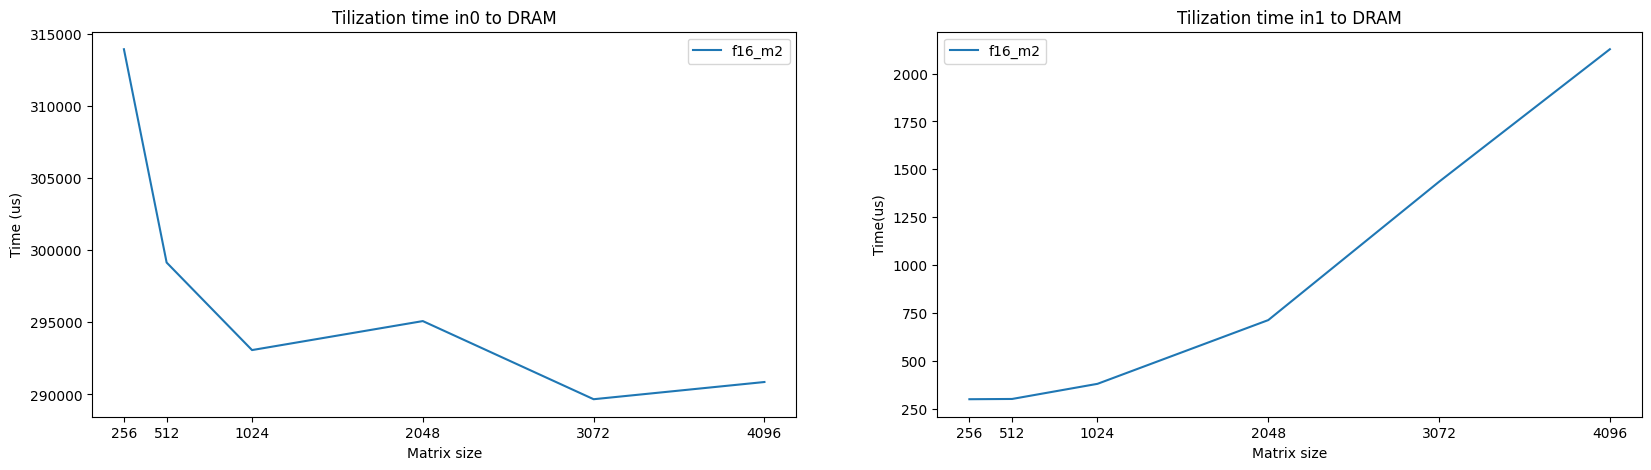

In [103]:
df_tilization0 = get_column_df_info(df, 'tilization_in0', mean=True) 
df_tilization1 = get_column_df_info(df, 'tilization_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_tilization0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Tilization time in0 to DRAM")

plot = sns.lineplot(df_tilization1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Tilization time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [104]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0.index * df_transf0.index
for conf in df_transf0.columns:
    df_transf_norm_b[conf] = (16 * elements) / df_transf0[conf]

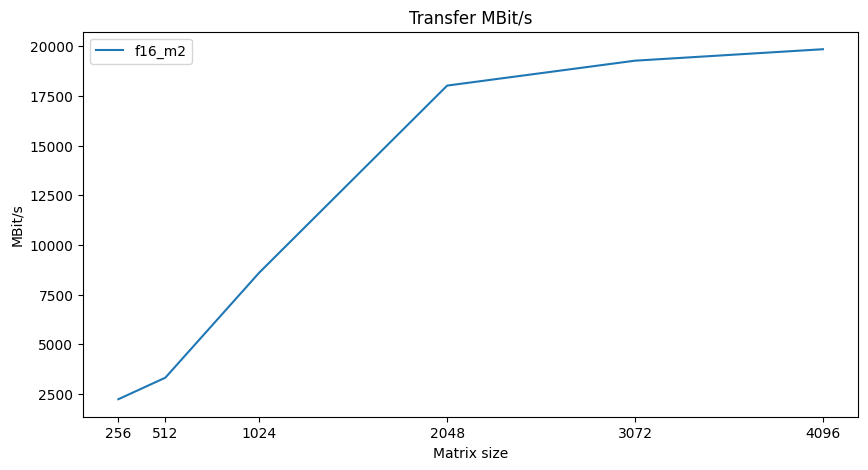

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("Transfer MBit/s")

plt.show()

## Compile time

In [106]:
df_compile = get_column_df_info(df, 'compile_time')
df_compile

,f16_m2
256,614325.921535
512,616725.540161
1024,616834.418774
2048,630002.512932
3072,619996.635914
4096,627062.500715


To be cleared

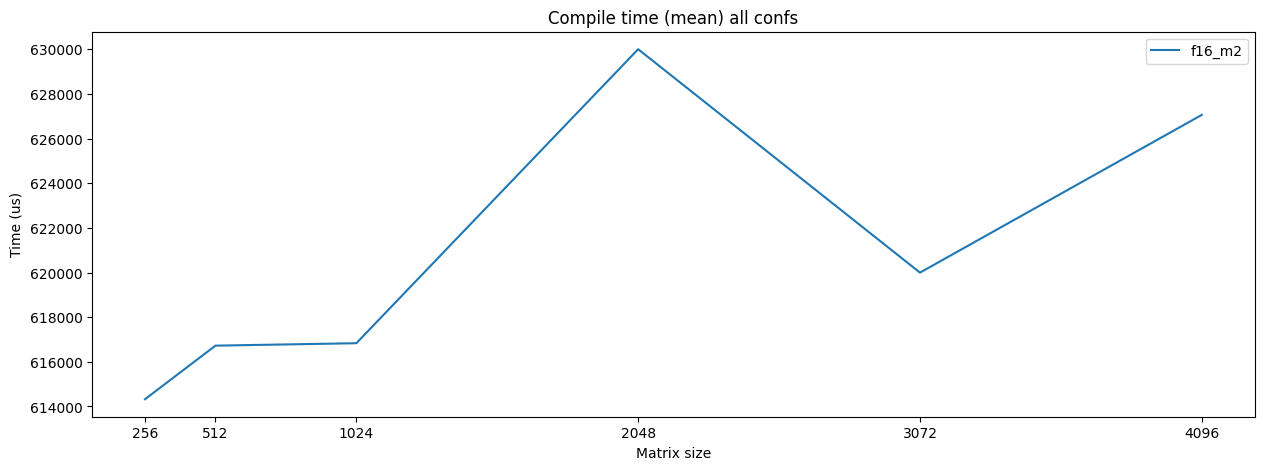

In [107]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compile, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Compile time (mean) all confs")

plt.show()

Mmhhhh..

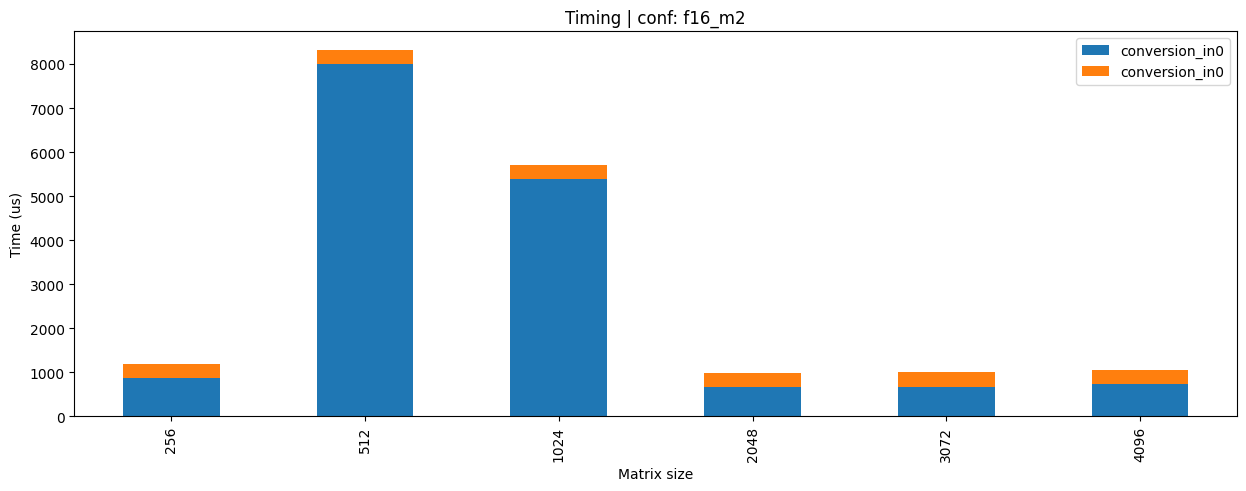

In [117]:
fig, ax = plt.subplots(figsize=(15,5))
df_combined = pd.concat([df_conversion0, df_conversion1], axis=1)
df_combined.columns = ["conversion_in0", "conversion_in0"]
df_combined

# Create a stacked bar plot
plot = df_combined.plot(kind='bar', stacked=True, ax=ax)


plot.set_title(f'Timing | conf: {conf}')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

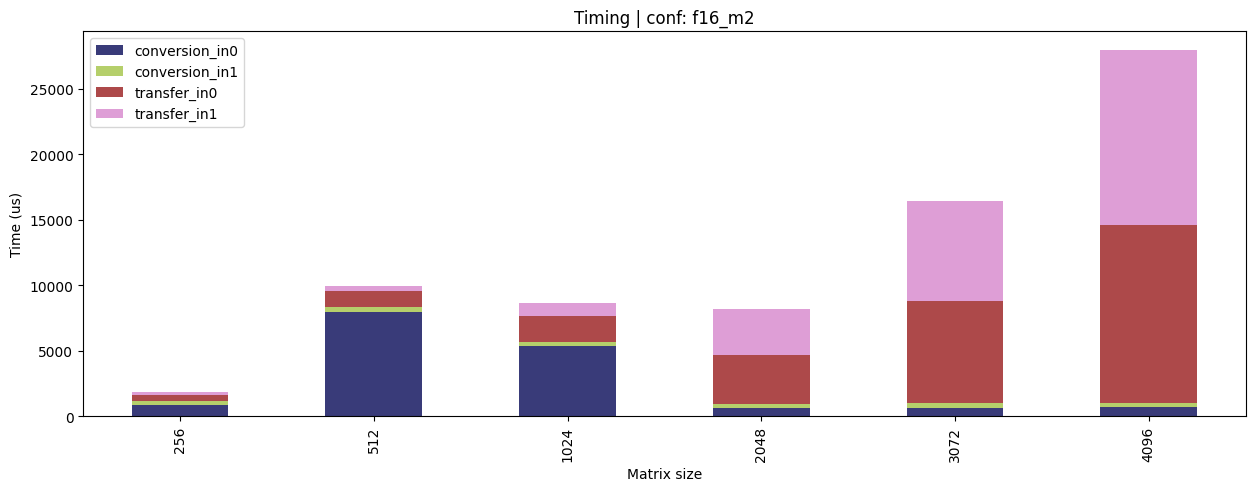

In [118]:
fig, ax = plt.subplots(figsize=(15,5))
df_combined = pd.concat([df_conversion0, df_conversion1, df_transf0, df_transf1], axis=1)
df_combined.columns = ["conversion_in0", "conversion_in1", "transfer_in0", "transfer_in1"]
df_combined

# Create a stacked bar plot
plot = df_combined.plot(kind='bar', stacked=True, ax=ax, colormap="tab20b")

plot.set_title(f'Timing | conf: {conf}')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

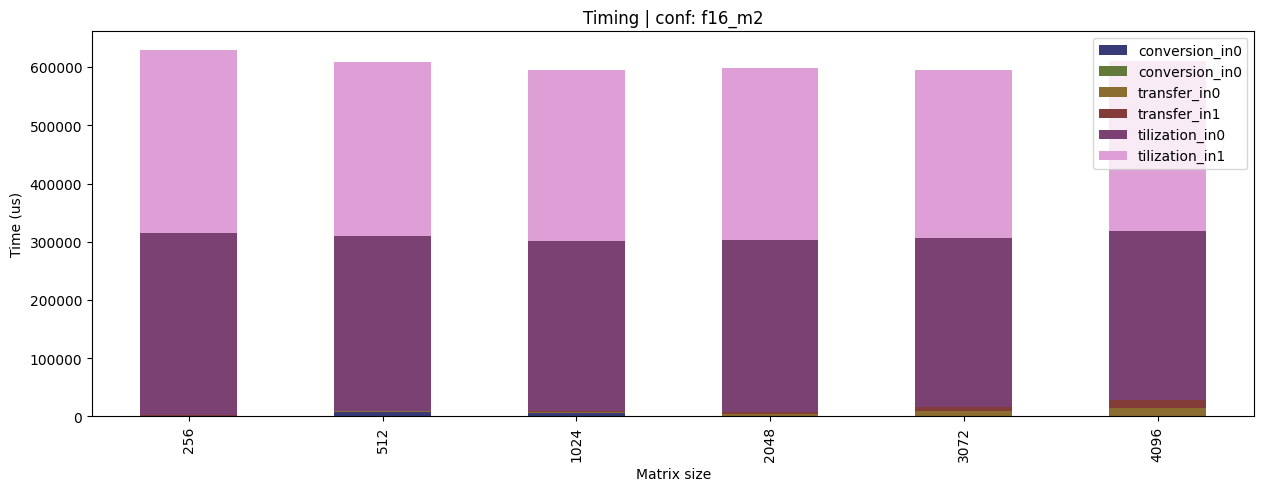

In [121]:
fig, ax = plt.subplots(figsize=(15,5))
df_combined = pd.concat([df_conversion0, df_conversion1, df_transf0, df_transf1, df_tilization0, df_tilization0], axis=1)
df_combined.columns = ["conversion_in0", "conversion_in0", "transfer_in0", "transfer_in1", "tilization_in0", "tilization_in1"]
df_combined

# Create a stacked bar plot
plot = df_combined.plot(kind='bar', stacked=True, ax=ax, colormap="tab20b")

plot.set_title(f'Timing | conf: {conf}')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

In [122]:
df_data_mv = df_conversion0 + df_conversion1 + df_transf0 + df_transf1 + df_tilization0 + df_tilization0
df_data_mv

,f16_m2
256,629743.815660
512,608257.937431
1024,594800.881147
2048,598356.937170
3072,595805.474520
4096,609702.105522


## Inference

In [123]:
df_sr = get_column_df_info(df, "second_run")
df_sr

,f16_m2
256,383.968353
512,377.490520
1024,531.836748
2048,1234.710217
3072,2562.423944
4096,4809.458256


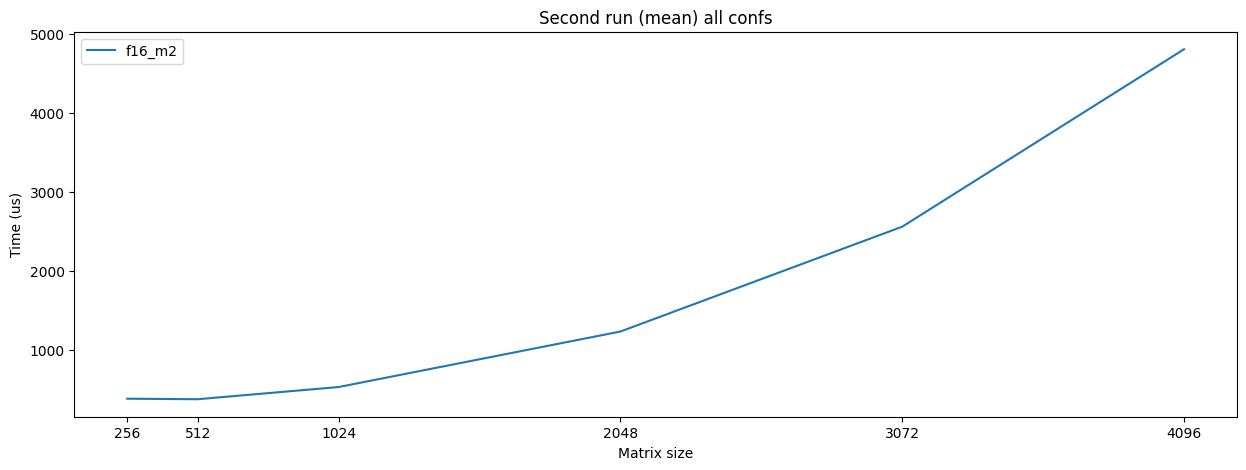

In [124]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_sr, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Second run (mean) all confs")

plt.show()